# Mini-JDR (Jeu de Rôle)

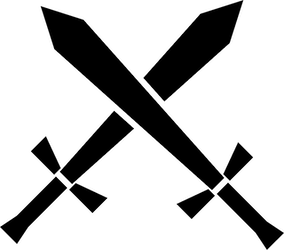

Prenons un JDR (Jeu de Rôle), dont les personnages sont constitués ainsi :

- ils ont 4 caractéristiques numériques entre 1 et 40, à savoir `force`, `endurance`, `rapidité`, `intelligence`;
- ils ont un nombre de points de `vie` de départ calculé à partir des caractéristiques endurance + force//2 ;
- ils possèdent bien sûr un `nom`;
- leur nombre de points d'`expérience` au départ est de 0, et leur `niveau` est de 1;
- chaque personnage peut mener une `attaque`, qui consiste à ajouter un nombre aléatoire entre 1 et 20 à sa force
- chaque personnage peut se `défendre` d'une attaque qui lui est lancée en ajoutant un nombre aléatoire de 1 à 20 à son endurance. Si ce résultat est supérieur ou égal au niveau d'attaque, l'attaque a échouée, sinon le personnage perd un nombre de points de vie égal à la différence entre le niveau d'attaque et le niveau de défense.

## 1. Modélisation des personnages

Pour construire un tel personnage, nous allons devoir renseigner son `nom`, et ses 4 caractéristiques. 

Ses points de `vie`, son `expérience` et son `niveau` sont automatiquement calculés.

Tous sont cependant des `attributs` du personnage.

![](https://g.gravizo.com/svg?%40startuml%3B%0Aclass%20Personnage%20%7B%3B%0A%20%20%20nom%20%3A%20str%3B%0A%20%20%20force%20%3A%20int%3B%0A%20%20%20endurance%20%3A%20int%3B%0A%20%20%20rapidite%20%3A%20int%3B%0A%20%20%20intelligence%20%3A%20int%3B%0A%7D%3B%0A%0A%40enduml)

💻 __À Faire 1__ : Créer un module `personnage` contenant la déclaration de l'objet `Personnage`et son constructeur.

💻 __À Faire 2__ : "Protéger" la création d'un personnsage en créant les assertions adéquates permettant d'obtenir le comportement suivant :

- La méthode constructeur `__init__()` devra vérifier si `nom` est dy type str, et si les 4 autres attributs de construction sont type int. L'erreur devra interrompre l'exécution du programme qui la déclenche !
- La méthode constructeur `__init__()` devra vérifier si les valeurs fournies pour les 4 attributs numériques sont entre 1 et 40. L'erreur devra interrompre l'exécution du programme qui la déclenche !
- La méthode constructeur `__init__()` devra si la chaîne de caractère `nom` est non vide. L'erreur devra interrompre l'exécution du programme qui la déclenche !

👍 __Indication__ : Il est possible de considérer les 4 personnages suivants pour tester et valider votre implémentation.

```python
>>> joueur1 = Personnage('Gerwin', 18, 25, 12, 30)
>>> joueur2 = Personnage('Altius', 34, 10, 20, 12)
>>> joueur3 = Personnage('Brearn', 17, 34, 18, 25)
>>> joueur4 = Personnage('Twinette', 47, -2, 11, 21)
```

⚠️ __Rappel__ : 

La classe `Personnage` permet de décrire __l'objet__ avec ses __attributs__ et __méthodes__. 

`joueur1`, `joueur2`, `joueur3` et `joueur4` sont des __instances__ de cette classe. 

![](https://g.gravizo.com/svg?%40startuml%3B%0Aclass%20Personnage%20%7B%3B%0A%20%20%20nom%20%3A%20str%3B%0A%20%20%20force%20%3A%20int%3B%0A%20%20%20endurance%20%3A%20int%3B%0A%20%20%20rapidite%20%3A%20int%3B%0A%20%20%20intelligence%20%3A%20int%3B%0A%7D%3B%0A%0Aentity%20Joueur1%20extends%20Personnage%7B%3B%0A%20%20nom%20%3A%20'Gerwin'%3B%0A%20%20force%20%3A%2018%3B%0A%20%20%20endurance%20%3A%2025%3B%0A%20%20%20rapidite%20%3A%2012%3B%0A%20%20%20intelligence%20%3A%2030%3B%0A%7D%3B%0A%0Aentity%20Joueur2%20extends%20Personnage%7B%3B%0A%20%20nom%20%3A%20'Altius'%3B%0A%20%20force%20%3A%2034%3B%0A%20%20%20endurance%20%3A%2010%3B%0A%20%20%20rapidite%20%3A%2020%3B%0A%20%20%20intelligence%20%3A%2012%3B%0A%7D%3B%0A%0Aentity%20Joueur3%20extends%20Personnage%7B%3B%0A%20%20nom%20%3A%20'Brearn'%3B%0A%20%20force%20%3A%2017%3B%0A%20%20%20endurance%20%3A%2034%3B%0A%20%20%20rapidite%20%3A%2018%3B%0A%20%20%20intelligence%20%3A%2025%3B%0A%7D%3B%0A%0Aentity%20Joueur4%20extends%20Personnage%7B%3B%0A%20%20nom%20%3A%20'Twinette'%3B%0A%20%20force%20%3A%2047%3B%0A%20%20%20endurance%20%3A%20-2%3B%0A%20%20%20rapidite%20%3A%2011%3B%0A%20%20%20intelligence%20%3A%2021%3B%0A%7D%3B%0A%0A%40enduml)

## 2. Préparatif au combat

Notre personnage possède des attributs mais aucune méthode.

Mettons à jour l'interface de la classe `Personnage` comme suit :

![](https://g.gravizo.com/svg?%40startuml%3B%0Aclass%20Personnage%20%7B%3B%0A%20%20%20nom%20%3A%20str%3B%0A%20%20%20force%20%3A%20int%3B%0A%20%20%20endurance%20%3A%20int%3B%0A%20%20%20rapidite%20%3A%20int%3B%0A%20%20%20intelligence%20%3A%20int%3B%0A%7Bmethod%7D%20__str__()%3A%20str%3B%0A%7Bmethod%7D%20attaque()%3A%20int%3B%0A%7Bmethod%7D%20defendre(valeurAttaque)%3A%20bool%3B%0A%7Bmethod%7D%20initiative()%3A%20int%3B%0A%7Bmethod%7D%20__eq__(other)%3A%20bool%3B%0A%7D%3B%0A%0A%40enduml)

💻 __À Faire 3__ : Implémenter une méthode de classe `__str__` qui permette d'afficher les caractéristiques d'un personnage de la manière suivante :

```python
>>> print(joueur1)
Bonjour, je suis Gerwin, de niveau 1. J'ai 18 en force, 25 en endurance, 12 en rapidité et 30 en intelligence. J'ai 35 Points de Vie.
```

💻 __À Faire 4__ : Implémenter une méthode de classe `attaque` qui renvoie un entier égal à la valeur de force du personnage auquel on ajoute un nombre aléatoire entre 1 et 20.

💻 __À Faire 5__ : Implémenter une méthode de classe `defense(valeurAttaque)` qui ajoute un nombre aléatoire de 1 à 20 à l'endurance du personnage. Si ce résultat est supérieur ou égal à `valeurAttaque`, l'attaque a échouée et la méthode renvoie True. Sinon le personnage perd un nombre de points de vie égal à la différence entre `valeurAttaque` et le niveau de défense, et la méthode renvoie False.

💻 __À Faire 6__ : Implémenter une méthode de classe `initiative` qui renvoie un entier égal à la valeur de rapidité du personnage auquel on ajoute un nombre aléatoire entre 1 et 20.

💻 __À Faire 7__ : On considère que deux personnages sont égaux quand ils possèdent les mêmes caractéristiques numériques de bases (force, endurance, rapidite et intelligence). Redéfinir la méthode DUNDERS `__eq__`(self, other) pour qu'elle corresponde à cette définition.

## 3. Place au combat

Un combat de ce Mini-JDR se déroule selon le schéma suivant :

- Chaque personnage tire son initiative.
- Le joueur ayant l'initiative la plus élevée effectue son attaque en premier, et le second se défend. 
  - En cas d'égalité d'initiative, le joeur d'attaque sera celui qui possède la rapidité la plus élevée. 
  - En cas d'égalité de rapidité, le premier joueur sera déterminé aléatoirement.
- Si le deuxième joueur est toujours vivant (ses points de vie sont supérieurs à 0), il effectue son attaque, et le premier se défend.
- Si les deux joueurs sont toujours vivants, on recommence un nouveau tour en reprenant en 1. Sinon on affiche le vainqueur.
- Le vainqueur récolte un nombre de points d'expérience égal à : nombre d'attaque réussie * 2 + nombre de defense réussie.

Vous devrez implémenter un programme simulant un combat entre Gerwin et Altius, dont la sortie console sera sous la forme suivante :

```txt
Round 1
Gerwin a l'initiative et attaque avec 28
Altius réussit sa défense
Altius attaque avec 40
Gerwin rate sa défense et n'a plus que 25 points de vie

Round 2
...

Round n
Le vainqueur est ..., il lui reste ... points de vie. Il gagne ... points d'expériences.
```

Le programme permettant le combat devra être dans un module `combat.py` séparé de celui contenant la classe `Personnage` (la classe `Personnage` étant importée depuis le module `personnage.py` par la commande suivante :

```python
from personnage import Personnage
```

## 4. Pour aller plus loin

À la fin d'un round, un personnage a la capacité de se soigner.

- Sa capacité de soin est calculée en fonction de son `intelligence`.
- un nombre `n` est généré aléatoirement entre 1 et 40,
- si l'`intelligence` est supérieure ou égale à `n`, le personnage est soigné,
- dans cas, le nombre de points de `vie` du personnage est incrémenté d'un nombre aléatoire entre 1 et 10% des points de `vie` actuel du personnage (Attention, le nombre de points de vie d'un personnage ne peut excéder 40).

💻 __À Faire 8__ : Implémenter une méthode de classe `soigner()` qui soigne le personnage selon le principe ci-dessus. La méthode renvoie True si le personnage a été soigné, False sinon.

💻 __À Faire 9__ : Modifier le programme principal du module `combat.py` pour appliquer la fonctionnalité de soin à chaque fin de round. 